<a href="https://colab.research.google.com/github/vatsbalar22/stock-prediction-DL/blob/main/colab_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model train with Deep Learnig

# Data extract through API

In [2]:
from alpha_vantage.timeseries import TimeSeries
api_key = 'RDW63LUED9U3S55M'
symbol = 'RELIANCE.BSE'

def get_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data
def prepare_data(data):
    data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return data

data = get_stock_data(symbol,api_key)
df = prepare_data(data)



In [3]:
df =df.reset_index()
df


,date,Open,High,Low,Close,Volume
0,2024-02-23,2971.4000,2996.1500,2965.2500,2986.3500,653001.0
1,2024-02-22,2937.9500,2969.1000,2916.0000,2963.3500,212597.0
2,2024-02-21,2943.8500,2977.0000,2916.1500,2938.2000,103405.0
3,2024-02-20,2949.9000,2949.9000,2924.0000,2940.7500,104430.0
4,2024-02-19,2921.3500,2958.8000,2907.5500,2946.1500,163441.0
...,...,...,...,...,...,...
4714,2005-01-07,359.8269,373.1159,359.5202,368.5840,16969845.0
4715,2005-01-06,357.7824,365.6195,356.1468,358.4297,13446517.0
4716,2005-01-05,358.1230,363.9158,351.8194,361.1217,16954266.0
4717,2005-01-04,364.5972,371.3782,360.8491,361.7351,10059943.0


In [4]:
# Assuming 'df' is your DataFrame containing the stock data

# Add a new column 'Market_High_Indicator' to indicate if the market high was reached
df['Market_High_Indicator'] = (df['High'] > df['Close'].shift(1)).astype(int)

# Display the DataFrame with the new column
print(df)


           date       Open       High        Low      Close      Volume  \
0    2024-02-23  2971.4000  2996.1500  2965.2500  2986.3500    653001.0   
1    2024-02-22  2937.9500  2969.1000  2916.0000  2963.3500    212597.0   
2    2024-02-21  2943.8500  2977.0000  2916.1500  2938.2000    103405.0   
3    2024-02-20  2949.9000  2949.9000  2924.0000  2940.7500    104430.0   
4    2024-02-19  2921.3500  2958.8000  2907.5500  2946.1500    163441.0   
...         ...        ...        ...        ...        ...         ...   
4714 2005-01-07   359.8269   373.1159   359.5202   368.5840  16969845.0   
4715 2005-01-06   357.7824   365.6195   356.1468   358.4297  13446517.0   
4716 2005-01-05   358.1230   363.9158   351.8194   361.1217  16954266.0   
4717 2005-01-04   364.5972   371.3782   360.8491   361.7351  10059943.0   
4718 2005-01-03   354.4090   371.0715   354.4090   370.1173  11842921.0   

      Market_High_Indicator  
0                         0  
1                         0  
2        

#Data visualization

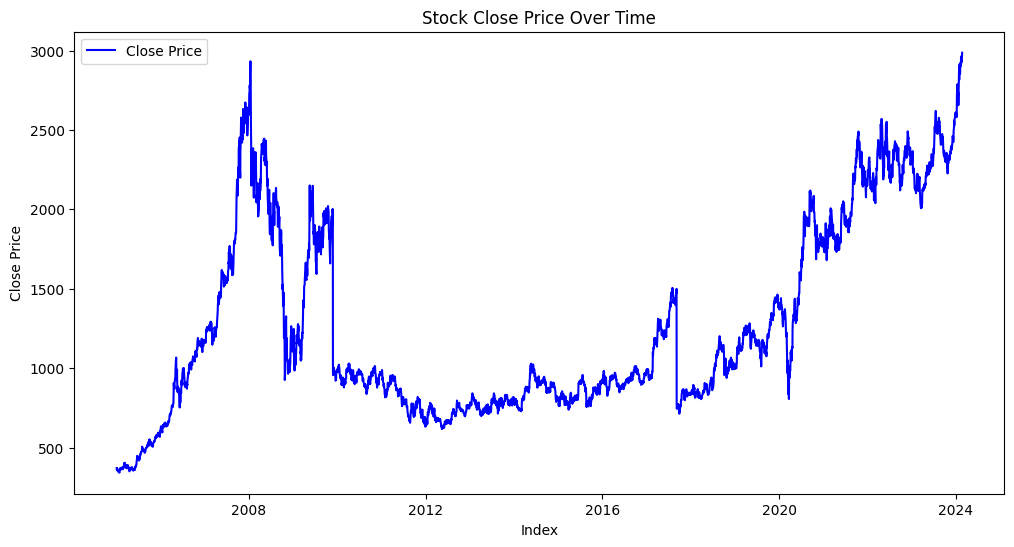

In [5]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Data Analysis

In [6]:
df.describe()

,date,Open,High,Low,Close,Volume,Market_High_Indicator
count,4719,4719.000000,4719.000000,4719.000000,4719.000000,4.719000e+03,4719.000000
mean,2014-07-30 04:20:35.855054080,1272.697955,1289.089143,1255.928026,1272.013847,2.974912e+06,0.740835
min,2005-01-03 00:00:00,344.152500,347.798500,339.518500,341.699200,0.000000e+00,0.000000
25%,2009-10-18 00:00:00,823.465850,830.553750,813.141750,822.417500,4.208825e+05,0.000000
50%,2014-07-24 00:00:00,989.198300,1004.148800,975.706300,991.021400,8.670090e+05,1.000000
75%,2019-05-18 12:00:00,1809.519550,1830.258600,1784.176000,1807.126300,2.533722e+06,1.000000
max,2024-02-23 00:00:00,2971.400000,2996.150000,2965.250000,2986.350000,8.021841e+08,1.000000
std,NaN,611.275318,619.452077,603.381443,611.444986,2.067644e+07,0.438223


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719 entries, 0 to 4718
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4719 non-null   datetime64[ns]
 1   Open                   4719 non-null   float64       
 2   High                   4719 non-null   float64       
 3   Low                    4719 non-null   float64       
 4   Close                  4719 non-null   float64       
 5   Volume                 4719 non-null   float64       
 6   Market_High_Indicator  4719 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 258.2 KB


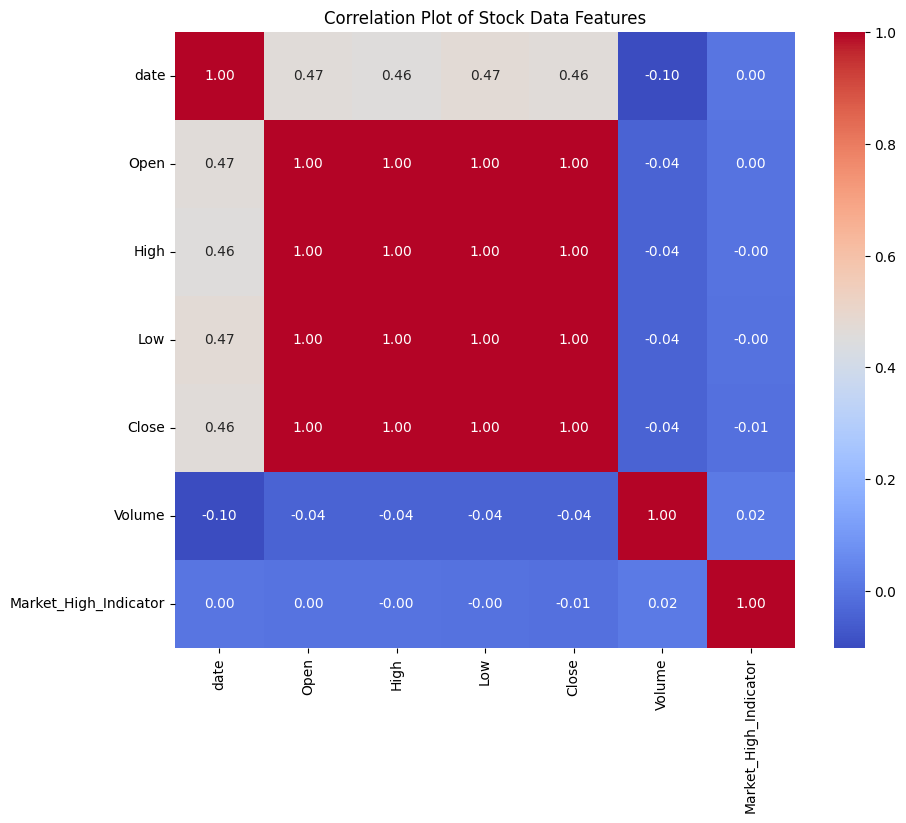

In [8]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [9]:
# Drop the 'Date' column from the DataFrame
df = df.drop(columns=['date'])

# Split the data into features (X) and target (y)
X = df.drop(columns=['Market_High_Indicator'])  # Features are all columns except 'Market_High_Indicator'
y = df['Market_High_Indicator']  # Target column is 'Market_High_Indicator'

# Now, you can use X and y for further processing, such as training and testing your model


#Model training

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(columns=['Market_High_Indicator'])  # Features are all columns except 'Market_High_Indicator'
y = df['Market_High_Indicator']  # Target column is 'Market_High_Indicator'

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can use X_train, X_test, y_train, and y_test for training and evaluating your model

In [11]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


2024-02-26 04:05:46.271557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 04:05:46.271972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 04:05:46.676810: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 04:05:47.478514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 04:05:51.633774: W tensorflow/compiler/tf2

Epoch 1/10
95/95 [==============================] - 1s 3ms/step - loss: 9322.3809 - accuracy: 0.6222 - val_loss: 1662.3596 - val_accuracy: 0.7285
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 17798.9980 - accuracy: 0.6632 - val_loss: 66612.4844 - val_accuracy: 0.7285
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 28903.8359 - accuracy: 0.6778 - val_loss: 13926.4873 - val_accuracy: 0.7285
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 2066.1331 - accuracy: 0.5930 - val_loss: 4941.8999 - val_accuracy: 0.7338
Epoch 5/10
95/95 [==============================] - 0s 1ms/step - loss: 27813.6582 - accuracy: 0.6636 - val_loss: 1636.8553 - val_accuracy: 0.6795
Epoch 6/10
95/95 [==============================] - 0s 1ms/step - loss: 1305.9092 - accuracy: 0.5788 - val_loss: 2765.7676 - val_accuracy: 0.7285
Epoch 7/10
95/95 [==============================] - 0s 2ms/step - loss: 1752.2334 - accuracy: 0.6288 - val_loss: 4865.6

#Predict next day high

In [12]:
# Predict the next day's market high indicator
last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]
last_row_features = last_row_features.values.reshape(1, -1)
next_day_prediction = model.predict(last_row_features)

# Convert the prediction to binary (0 or 1)
next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)

1/1 [==============================] - 0s 62ms/step
Predicted Market High Indicator for the Next Day: 0


In [20]:
# from sklearn.linear_model import LogisticRegression

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Once trained, you can use the model to make predictions on the test data
# y_pred = model.predict(X_test)



In [19]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [18]:
# # Extract features from the last row of your dataset
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]

# # Reshape the features array as scikit-learn expects a 2D array
# last_row_features = last_row_features.values.reshape(1, -1)

# # Predict the next day's market high indicator
# next_day_prediction = model.predict(last_row_features)

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction[0])


In [17]:
# # Predict the next day's market high indicator
# last_row_features = df.drop(columns=['Market_High_Indicator']).iloc[-1]
# last_row_features = last_row_features.values.reshape(1, -1)
# next_day_prediction = model.predict(last_row_features)

# # Convert the prediction to binary (0 or 1)
# next_day_prediction_binary = 1 if next_day_prediction > 0.5 else 0

# print("Predicted Market High Indicator for the Next Day:", next_day_prediction_binary)
